<a href="https://colab.research.google.com/github/park-jiha/deep-learning/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%8B%A4%EB%A3%A8%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## pands 다뤄보기

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('pima-indians-diabetes.csv',names=["pregnant","plasma","pressure","thickness","insulin","BMI",
                        "pedigree","age","class"]) # 이 데이터에는 헤더가 없으니 직접 넣어주자
df.head(5)

pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1

전반적인 정보 확인, null 값 확인할 때도 쓰임

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe() # 통계값 보여줌

pregnant      plasma    pressure  ...    pedigree         age       class
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469  ...    0.471876   33.240885    0.348958
std      3.369578   31.972618   19.355807  ...    0.331329   11.760232    0.476951
min      0.000000    0.000000    0.000000  ...    0.078000   21.000000    0.000000
25%      1.000000   99.000000   62.000000  ...    0.243750   24.000000    0.000000
50%      3.000000  117.000000   72.000000  ...    0.372500   29.000000    0.000000
75%      6.000000  140.250000   80.000000  ...    0.626250   41.000000    1.000000
max     17.000000  199.000000  122.000000  ...    2.420000   81.000000    1.000000

[8 rows x 9 columns]

In [9]:
df[['age','BMI']]

age   BMI
0     50  33.6
1     31  26.6
2     32  23.3
3     21  28.1
4     33  43.1
..   ...   ...
763   63  32.9
764   27  36.8
765   30  26.2
766   47  30.1
767   23  30.4

[768 rows x 2 columns]

## 데이터 가공

In [10]:
# 당뇨병 질병을 예측 
# 어떤 정보와 당뇨병 발병이 어떠한 관계에 있는지 살펴봐야함 
new_group = df[['pregnant','class']].groupby(['pregnant'],as_index=False)
new_group = new_group.mean().sort_values(by='pregnant',ascending=True)
new_group
# 임신 횟수당 발병 확률 테이블

pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000

## matplotlib를 활용하여 데이터 시각화

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

### 상관 관계도

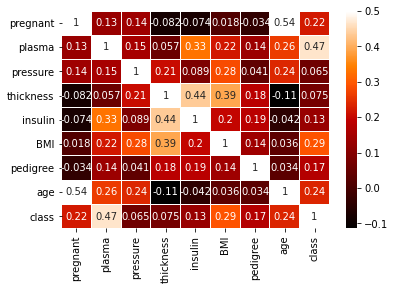

In [15]:
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5,cmap=plt.cm.gist_heat,linecolor='white',annot=True)
plt.show()

빠진 데이터를 채워넣거나 문자열 데이터를 숫자로 바꾸거나 전혀 관계가 없는 쓸모없는 데이터가 끼어있는걸 바꾸는 과정을 **데이터 전처리 과정** 이라 하며 모델 성능 향상을 위해 빠져서는 안되는 중요한 과정이다

### 모델 설정, 실행, 평가

X와 Y의 분리

In [16]:
x_data = df.iloc[:,:8]
y_data = df.iloc[:,8]

x_data

pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age
0           6     148        72         35        0  33.6     0.627   50
1           1      85        66         29        0  26.6     0.351   31
2           8     183        64          0        0  23.3     0.672   32
3           1      89        66         23       94  28.1     0.167   21
4           0     137        40         35      168  43.1     2.288   33
..        ...     ...       ...        ...      ...   ...       ...  ...
763        10     101        76         48      180  32.9     0.171   63
764         2     122        70         27        0  36.8     0.340   27
765         5     121        72         23      112  26.2     0.245   30
766         1     126        60          0        0  30.1     0.349   47
767         1      93        70         31        0  30.4     0.315   23

[768 rows x 8 columns]

In [17]:
y_data

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

모델 설정

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import tensorflow as tf

In [22]:
model = Sequential()
model.add(Dense(16,input_dim = 8 ,activation='relu')) # 입력층,16 개의 노드, 입력(x)의 차원 8,활성화함수 relu
model.add(Dense(8, activation='relu')) # 은닉층 8 개의 노드, 활성화함수 relu
model.add(Dense(4, activation='relu')) # 은닉층 4 개의 노드, 활성화함수 relu
model.add(Dense(1,activation='sigmoid')) # 출력층 , 활성화함수 sigmoid

optim = optimizers.Adam(learning_rate=0.005)  ## 옵티마이저 설정(경사하강법 등)
model.compile(optimizer = optim,loss='binary_crossentropy',metrics=['accuracy']) #손실함수를 교차엔트로피로

모델 학습 실행

In [23]:
model.fit(x_data,y_data,epochs=200,batch_size=4)

Epoch 1/200
192/192 [==============================] - 1s 1ms/step - loss: 0.7817 - accuracy: 0.6440
Epoch 2/200
192/192 [==============================] - 0s 1ms/step - loss: 0.6501 - accuracy: 0.6582
Epoch 3/200
192/192 [==============================] - 0s 1ms/step - loss: 0.6366 - accuracy: 0.6729
Epoch 4/200
192/192 [==============================] - 0s 1ms/step - loss: 0.6556 - accuracy: 0.6366
Epoch 5/200
192/192 [==============================] - 0s 1ms/step - loss: 0.6566 - accuracy: 0.6358
Epoch 6/200
192/192 [==============================] - 0s 1ms/step - loss: 0.6363 - accuracy: 0.6686
Epoch 7/200
192/192 [==============================] - 0s 1ms/step - loss: 0.6347 - accuracy: 0.6707
Epoch 8/200
192/192 [==============================] - 0s 1ms/step - loss: 0.6666 - accuracy: 0.6191
Epoch 9/200
192/192 [==============================] - 0s 1ms/step - loss: 0.6436 - accuracy: 0.6564
Epoch 10/200
192/192 [==============================] - 0s 1ms/step - loss: 0.6343 - accura

모델 평가

In [24]:
print("acc : %.2f"%(model.evaluate(x_data,y_data)[1]))

24/24 [==============================] - 0s 994us/step - loss: 0.6469 - accuracy: 0.6510
acc : 0.65


## 과정 정리
- 데이터 불러오기
 - numpy로 불러오기 ,pandas 로 불러오기
- 데이터 전처리 과정
 - null(결측치) 비어있는값 채워넣는 등 처리
 - 문자열 데이터 숫자로 바꾸는 인코딩 과정
 - 데이터 시각화를 통해 데이터를 가공하는 전 과정
- 모델 설정 과 학습
 - 모델 설정과 신경망 모델 쌓기
 - 모델 컴파일
 - 모델 학습
- 모델 평가
 : 나중에 더 자세하게..